In [4]:
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [5]:
DataMood = pd.read_csv("AAA.csv")

In [6]:
DataMood

,DATE,AAA
0,1995-01-01,8.46
1,1995-02-01,8.26
2,1995-03-01,8.12
3,1995-04-01,8.03
4,1995-05-01,7.65
...,...,...
346,2023-11-01,5.28
347,2023-12-01,4.74
348,2024-01-01,4.87
349,2024-02-01,5.03


#№1
график xt

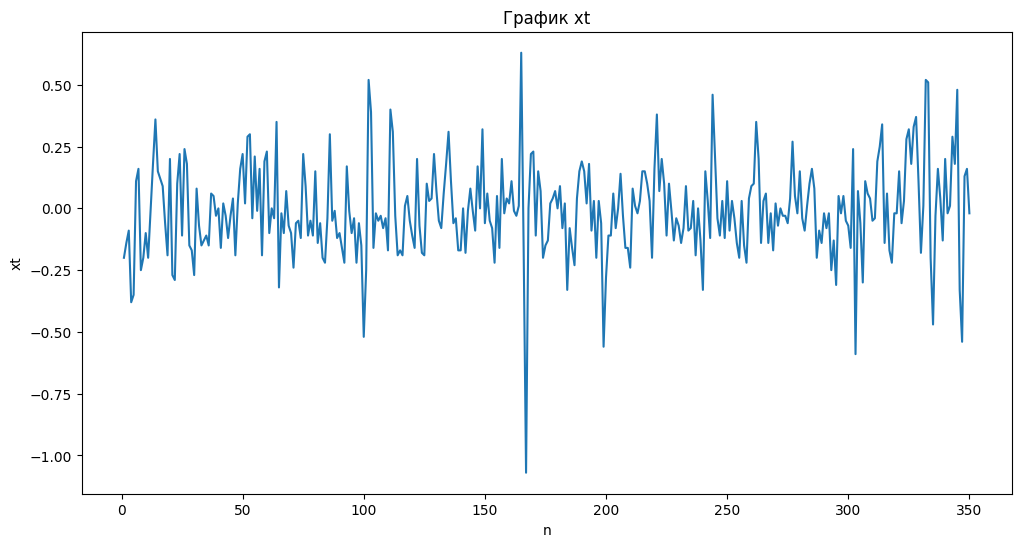

In [7]:
xt = DataMood['AAA'].diff().dropna()
plt.figure(figsize = (12, 6))
plt.plot(xt)
plt.title('График xt')
plt.xlabel('n')
plt.ylabel('xt')
plt.show()

#№2
графики ACF и PACF

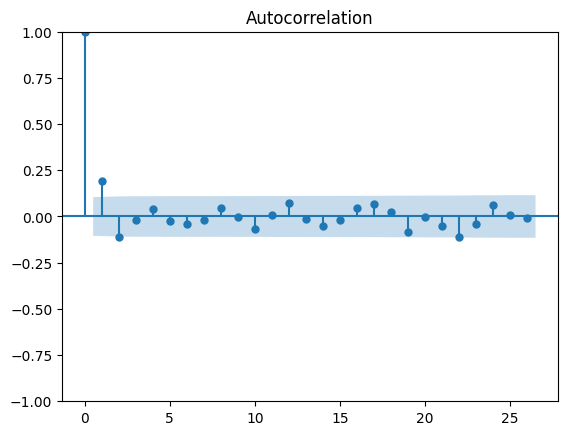

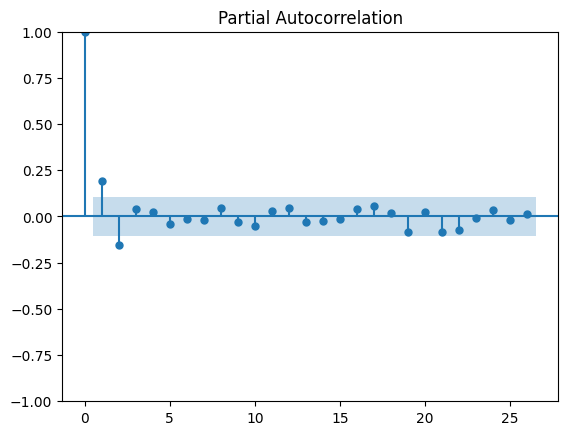

In [8]:
plot_acf(xt)
plot_pacf(xt)
plt.show()

#№3
Является ли ρ(5) значимым?

In [9]:
lags = 40
acf_values, conf_int = acf(xt, nlags = lags, alpha = 0.05)
critical_value = conf_int[:, 1]
acf_lag_5 = acf_values[5]
is_significant = abs(acf_lag_5) > critical_value[5]
print( is_significant)

False


Таким образом, на основе данного анализа мы не можем считать автокорреляцию на лаге 5 статистически значимой при уровне значимости 0.05.


#№4
Постройте подходящую ARMA модел

In [10]:
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(xt, order = (2, 0, 3))
results = model.fit()

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    AAA   No. Observations:                  350
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 104.264
Date:                Fri, 19 Apr 2024   AIC                           -194.529
Time:                        18:39:23   BIC                           -167.523
Sample:                             0   HQIC                          -183.780
                                - 350                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0099      0.012     -0.836      0.403      -0.033       0.013
ar.L1         -0.0179      0.043     -0.419      0.675      -0.102       0.066
ar.L2         -0.9748      0.042    -23.234      0.000      -1.057      -0.893
ma.L1          0.2563      0.057      4.476      0.000       0.144       0.369
ma.L2          0.9447      0.063     14.987      0.000       0.821       1.068
ma.L3          0.2124      0.055      3.853      0.000       0.104       0.320
sigma2         0.0322      0.002     17.079      0.000       0.029       0.036
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               101.21
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.21
Prob(H) (two-sided):                  0.75   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#№5
Дайте прогноз на 10 месяцев вперед.

In [13]:
forecast_steps = 10
forecast = results.forecast(steps=forecast_steps)
forecast

350   -0.080628
351    0.044273
352    0.065268
353   -0.064054
354   -0.082207
355    0.044180
356    0.059615
357   -0.063862
358   -0.076700
359    0.043893
Name: predicted_mean, dtype: float64

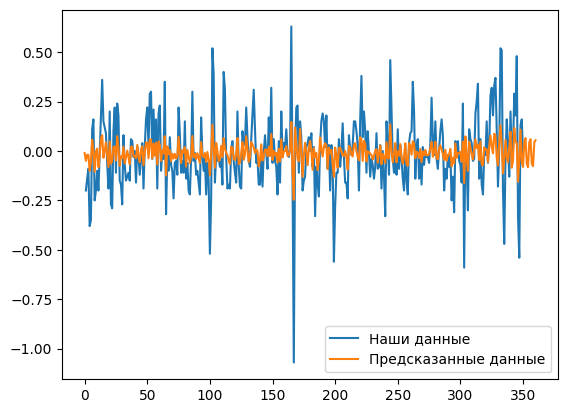

In [16]:
x_pred = results.predict(start = 0, end = 360)
plt.plot(xt, label='Наши данные')
plt.plot(x_pred, label='Предсказанные данные')
plt.legend()
plt.show()

In [15]:
x_pred

0     -0.009901
1     -0.050124
2     -0.018910
3     -0.019189
4     -0.101218
         ...   
356    0.059615
357   -0.063862
358   -0.076700
359    0.043893
360    0.054251
Name: predicted_mean, Length: 361, dtype: float64